In [1]:
import pandas as pd
import numpy as np
import pycountry


pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = pd.read_csv('data/player-stats/def_match_data.csv')
df.dropna(subset=['Date'], inplace=True) #filter out empty rows


## Preprocessing

In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Year'] = df['Year'].fillna(-1).astype(int)
df['Week'] = df['Date'].dt.isocalendar().week

# Get unique combinations of year and week
unique_timeframes = df[['Year', 'Week']].drop_duplicates()

# Create a unique identifier for each timeframe by combining year and week
df['YearWeek'] = df['Year'].astype(str) + '-' + df['Week'].astype(str)

# Make sure numeric columns are treated as such
metric_cols = ['Min']
df[metric_cols] = df[metric_cols].apply(pd.to_numeric, errors='coerce')

In [3]:
df[['Result.Outcome', 'Result.Score']] = df['Result'].str.split(' ', n=1, expand=True)
df = df.drop(['Match Report', 'Result'], axis=1) # Remove unnecessary columns

df['Min'] = df['Min'].replace({'Match Report': None})
df['Squad'] = df['Squad'].str.replace(r'^[a-z]{2,3}\s', '', regex=True)
df['Opponent'] = df['Opponent'].str.replace(r'^[a-z]{2,3}\s', '', regex=True)

df['Won'] = df['Result.Outcome'].apply(lambda x: 1 if x == 'W' else 0)
df['Started'] = df['Start'].apply(lambda x: 1 if x == 'Y' else 0)

boolean_cols = ['Won', 'Started']

In [4]:
df

,Player Link,Date,Day,Comp,Round,Venue,Squad,Opponent,Start,Pos,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks,xG,npxG,xAG,SCA,GCA,Cmp,Cmp%,PrgP,Carries,PrgC,Pass.Attempted,Succ,TakeOns.Attempted,Player Name,Year,Week,YearWeek,Result.Outcome,Result.Score,Won,Started
0,https://fbref.com/en/players/5f09991f/matchlog...,2023-08-08,Tue,Champions Lg,Third qualifying round,Home,PSV Eindhoven,Sturm Graz,Y,LB,90.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patrick van Aanholt,2023,32,2023-32,W,4–1,1,1
1,https://fbref.com/en/players/5f09991f/matchlog...,2023-08-12,Sat,Eredivisie,Matchweek 1,Home,PSV Eindhoven,Utrecht,Y,LB,90.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,64.0,1.0,0.0,1.0,0.1,0.1,0.3,3.0,1.0,47.0,82.5,2.0,24.0,3.0,57.0,0.0,0.0,Patrick van Aanholt,2023,32,2023-32,W,2–0,1,1
2,https://fbref.com/en/players/5f09991f/matchlog...,2023-08-15,Tue,Champions Lg,Third qualifying round,Away,PSV Eindhoven,Sturm Graz,Y,LB,90.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patrick van Aanholt,2023,33,2023-33,W,3–1,1,1
3,https://fbref.com/en/players/5f09991f/matchlog...,2023-08-19,Sat,Eredivisie,Matchweek 2,Away,PSV Eindhoven,Vitesse,Y,LB,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.0,28.0,84.8,3.0,17.0,2.0,33.0,0.0,0.0,Patrick van Aanholt,2023,33,2023-33,W,3–1,1,1
5,https://fbref.com/en/players/5f09991f/matchlog...,2023-08-30,Wed,Champions Lg,Play-off round,Home,PSV Eindhoven,Rangers,N,"On matchday squad, but did not play",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patrick van Aanholt,2023,35,2023-35,W,5–1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14868,https://fbref.com/en/players/f3f80000/matchlog...,2024-03-30,Sat,Eredivisie,Matchweek 27,Home,Go Ahead Eag,Excelsior,Y,AM,86.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,41.0,1.0,0.0,1.0,0.4,0.4,0.3,5.0,0.0,23.0,76.7,9.0,20.0,2.0,30.0,0.0,0.0,Willum Thor Willumsson,2024,13,2024-13,W,3–0,1,1
14869,https://fbref.com/en/players/f3f80000/matchlog...,2024-04-04,Thu,Eredivisie,Matchweek 28,Away,Go Ahead Eag,Ajax,Y,"AM,DM",90.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,46.0,1.0,1.0,1.0,0.4,0.4,0.1,2.0,0.0,28.0,82.4,5.0,24.0,0.0,34.0,0.0,0.0,Willum Thor Willumsson,2024,14,2024-14,D,1–1,0,1
14870,https://fbref.com/en/players/f3f80000/matchlog...,2024-04-07,Sun,Eredivisie,Matchweek 29,Home,Go Ahead Eag,Almere City,Y,DM,90.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,42.0,3.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,23.0,69.7,2.0,9.0,1.0,33.0,1.0,1.0,Willum Thor Willumsson,2024,14,2024-14,D,1–1,0,1
14871,https://fbref.com/en/players/f3f80000/matchlog...,2024-04-14,Sun,Eredivisie,Matchweek 30,Away,Go Ahead Eag,Utrecht,Y,AM,90.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,44.0,1.0,1.0,1.0,0.2,0.2,0.0,5.0,1.0,18.0,66.7,4.0,27.0,2.0,27.0,0.0,2.0,Willum Thor Willumsson,2024,15,2024-15,L,1–2,0,1


In [5]:
def categorize_squad(row, countries):
    if row['Squad'] in countries:
        return pd.Series([None, row['Squad']])
    else:
        return pd.Series([row['Squad'], None])

# Get a list of country names using pycountry
countries = [country.name for country in pycountry.countries]

# Apply the function to each row
df[['TeamSquad', 'NationalSquad']] = df.apply(categorize_squad, countries=countries, axis=1)

In [6]:
def fill_squads(group):
    group['NationalSquad'] = group['NationalSquad'].fillna(method='ffill').fillna(method='bfill')
    group['TeamSquad'] = group['TeamSquad'].fillna(method='ffill').fillna(method='bfill')
    return group

# Group by PlayerName and apply the filling function
df = df.groupby('Player Name').apply(fill_squads).reset_index(drop=True)


/var/folders/t0/f1kbfy_n4433_n3x1c7px_hr0000gn/T/ipykernel_38588/502287133.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group['NationalSquad'] = group['NationalSquad'].fillna(method='ffill').fillna(method='bfill')
/var/folders/t0/f1kbfy_n4433_n3x1c7px_hr0000gn/T/ipykernel_38588/502287133.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group['TeamSquad'] = group['TeamSquad'].fillna(method='ffill').fillna(method='bfill')
/var/folders/t0/f1kbfy_n4433_n3x1c7px_hr0000gn/T/ipykernel_38588/502287133.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after g

### NOTE: No players that come out for multiple national teams

In [7]:
unique_national_squads = df.groupby('Player Name')['NationalSquad'].nunique()

# Find players with more than one unique NationalSquad
players_with_multiple_national_squads = unique_national_squads[unique_national_squads > 1]

print(players_with_multiple_national_squads)

Series([], Name: NationalSquad, dtype: int64)


In [8]:
df['Pos'].unique()

array(['On matchday squad, but did not play', 'CM', 'LB', 'WB', 'LB,LM',
       'RW', 'LW', 'RM', nan, 'AM', 'LM', 'RB', 'CB', 'FW', 'LW,FW', 'DM',
       'RW,AM', 'LW,CB', 'CM,RM,AM', 'CM,LM', 'DM,AM,RW', 'RW,DM',
       'LB,RW', 'CB,LW', 'AM,CM', 'AM,FW', 'CM,DM', 'LW,RW', 'RW,WB',
       'CB,RB', 'RB,AM', 'LM,CM', 'RM,LM', 'CB,LB', 'RB,RM', 'RM,RB',
       'LW,LM', 'LW,AM,CM', 'DM,AM', 'AM,DM', 'RM,AM', 'FW,CM', 'RW,FW',
       'FW,RM', 'GK', 'DM,RB', 'LB,CB', 'RM,RW', 'RB,LW', 'FW,RB',
       'FW,LW', 'AM,RW', 'CM,FW', 'RM,DM', 'LB,LW', 'LM,LB', 'FW,LB',
       'AM,LW', 'RB,CB', 'AM,RB,LB', 'RW,RM', 'FW,RW', 'RM,FW', 'WB,LB',
       'RM,CM', 'DM,RM', 'DM,CM', 'LB,RB', 'RW,LW', 'RB,LB', 'DM,FW',
       'LW,DM', 'CM,RM', 'CM,WB', 'DM,RW', 'DM,CB', 'LM,RW', 'FW,LM',
       'CM,RM,LM', 'LW,AM', 'DM,LW', 'LM,CB', 'FW,AM', 'CB,DM', 'CM,AM',
       'CB,CM', 'CB,LB,RB', 'FW,WB', 'LB,CM', 'DM,CM,RM', 'LW,LB',
       'RB,DM', 'RB,LM', 'WB,CB', 'CB,WB', 'RB,WB', 'DM,LM,CM', 'AM,RM',
       'L

In [10]:
game_team_avg = df.groupby(['TeamSquad', 'Date'])[metric_cols].mean().reset_index()
game_team_avg

,TeamSquad,Date,Min
0,1860 Munich,2024-02-03,8.000000
1,1860 Munich,2024-02-06,66.000000
2,1860 Munich,2024-02-11,18.000000
3,1860 Munich,2024-03-02,81.000000
4,1860 Munich,2024-03-08,76.000000
...,...,...,...
2041,Zwolle,2024-03-31,66.000000
2042,Zwolle,2024-04-03,61.875000
2043,Zwolle,2024-04-06,76.153846
2044,Zwolle,2024-04-14,66.000000


#### NOTE: averages for each team, only for starting players.

In [46]:
# Function to calculate mean only for starting players within each group
def calculate_starting_players_average(group):
    starting_players = group[group['Start'] == 'Y']
    if not starting_players.empty:
        return starting_players[metric_cols].mean()
    else:
        return pd.Series({col: 0 for col in numeric_cols})

# Group by 'TeamSquad' and 'Date', apply the function to calculate averages
game_team_avg = df.groupby(['TeamSquad', 'Date']).apply(calculate_starting_players_average).reset_index()
game_team_avg.rename(columns={col: col + '_team_avg' for col in numeric_cols}, inplace=True)

/var/folders/t0/f1kbfy_n4433_n3x1c7px_hr0000gn/T/ipykernel_47972/201597665.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  game_team_avg = df.groupby(['TeamSquad', 'Date']).apply(calculate_starting_players_average).reset_index()


In [47]:
# Identify benched players
benched_players = df[df['Pos'] == "On matchday squad, but did not play"]

# Merge team game averages with the benched players' entries
benched_filled = pd.merge(benched_players, game_team_avg, on=['TeamSquad', 'Date'], how='left')

# Fill missing player stats with team averages
for col in numeric_cols:
    benched_filled[col] = benched_filled[col].fillna(benched_filled[col + '_team_avg'])

# Clean up the DataFrame by removing the additional average columns
benched_filled.drop(columns=[col + '_team_avg' for col in numeric_cols], inplace=True)

# Ensure unique indices by including 'Player Name' if it was not included yet
df.set_index(['TeamSquad', 'Date', 'Player Name'], inplace=True)
benched_filled.set_index(['TeamSquad', 'Date', 'Player Name'], inplace=True)

# Update operation
df.update(benched_filled)

# Reset index if necessary to return to the default integer index
df.reset_index(inplace=True)

In [48]:
df.to_csv('data/def_match_data_preprocessed.csv', index=False)

## Data to per week basis

#### NOTE: not all players play in each yearweek, resulting in not 482*45 rows, but less

In [16]:
# Group by player and week, then calculate means for numeric columns, sum for boolean columns, and count matches
grouped = df.groupby(['Player Name', 'YearWeek', 'TeamSquad'])
player_weekly_avg = grouped.agg({**{col: 'mean' for col in metric_cols}, 
                                 **{col: 'sum' for col in boolean_cols}}).reset_index()
player_weekly_avg['Match Count'] = grouped.size().values

#### NOTE: Previous 'issue' is fixed below, since we want a value for each row.

In [18]:
# Get unique years, weeks, and players
unique_year_weeks = df['YearWeek'].unique()
players = df['Player Name'].unique()

from itertools import product
all_combinations = pd.DataFrame(list(product(players, unique_year_weeks)), columns=['Player Name', 'YearWeek'])

# Merge the player averages with all possible weeks
full_player_data = all_combinations.merge(player_weekly_avg, on=['Player Name', 'YearWeek'], how='left')

In [14]:
full_player_data[['Year', 'Week']] = full_player_data['YearWeek'].str.split('-', expand=True)


In [15]:
full_player_data

,Player Name,YearWeek,Min,Won,Started,Match Count,Year,Week
0,Aaron Meijers,2023-33,NaN,0.0,0.0,1.0,2023,33
1,Aaron Meijers,2023-34,45.0,0.0,0.0,1.0,2023,34
2,Aaron Meijers,2023-35,90.0,0.0,1.0,1.0,2023,35
3,Aaron Meijers,2023-37,90.0,1.0,1.0,1.0,2023,37
4,Aaron Meijers,2023-38,90.0,1.0,1.0,1.0,2023,38
...,...,...,...,...,...,...,...,...
22720,Zidane Iqbal,2023-41,NaN,NaN,NaN,NaN,2023,41
22721,Zidane Iqbal,2023-46,NaN,NaN,NaN,NaN,2023,46
22722,Zidane Iqbal,2024-1,NaN,NaN,NaN,NaN,2024,1
22723,Zidane Iqbal,2023-26,NaN,NaN,NaN,NaN,2023,26


In [22]:
player_weekly_avg

,Player Name,YearWeek,TeamSquad,Min,Won,Started,Match Count
0,Aaron Meijers,2023-33,RKC Waalwijk,NaN,0,0,1
1,Aaron Meijers,2023-34,RKC Waalwijk,45.0,0,0,1
2,Aaron Meijers,2023-35,RKC Waalwijk,90.0,0,1,1
3,Aaron Meijers,2023-37,RKC Waalwijk,90.0,1,1,1
4,Aaron Meijers,2023-38,RKC Waalwijk,90.0,1,1,1
...,...,...,...,...,...,...,...
12330,Zidane Iqbal,2024-5,Utrecht,41.0,1,0,2
12331,Zidane Iqbal,2024-6,Utrecht,65.0,1,1,1
12332,Zidane Iqbal,2024-7,Utrecht,NaN,1,0,1
12333,Zidane Iqbal,2024-8,Utrecht,1.0,1,0,1


In [33]:
# full_player_data = full_player_data.merge(player_weekly_avg, on=['Player Name', 'YearWeek'], how='left')
full_player_data.to_csv('data/def_player_data_temp.csv', index=False)

In [26]:
# full_player_data[full_player_data['Player Name'] == 'Patrick van Aanholt']
full_player_data.merge(player_weekly_avg, on=['Player Name', 'YearWeek'], how='left')
full_player_data.to_csv('data/final/performance_data_per_week_per_player.csv', index=False)

## Data Analysis

#### Per team

In [377]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it's already been loaded and prepared
# Calculate the average 'Touches' per team per week
feyenoord = df[df['TeamSquad'].isin(['nl Feyenoord','Feyenoord', 'Ajax', 'PSV Eindhoven'])]
avg_touches = feyenoord.groupby(['TeamSquad', 'YearWeek'])['xG'].mean().reset_index()
avg_touches['YearWeek'] = pd.to_datetime(avg_touches['YearWeek'] + '-1', format='%Y-%W-%w')  # Convert 'YearWeek' to a datetime for accurate sorting
avg_touches.sort_values('YearWeek', inplace=True)


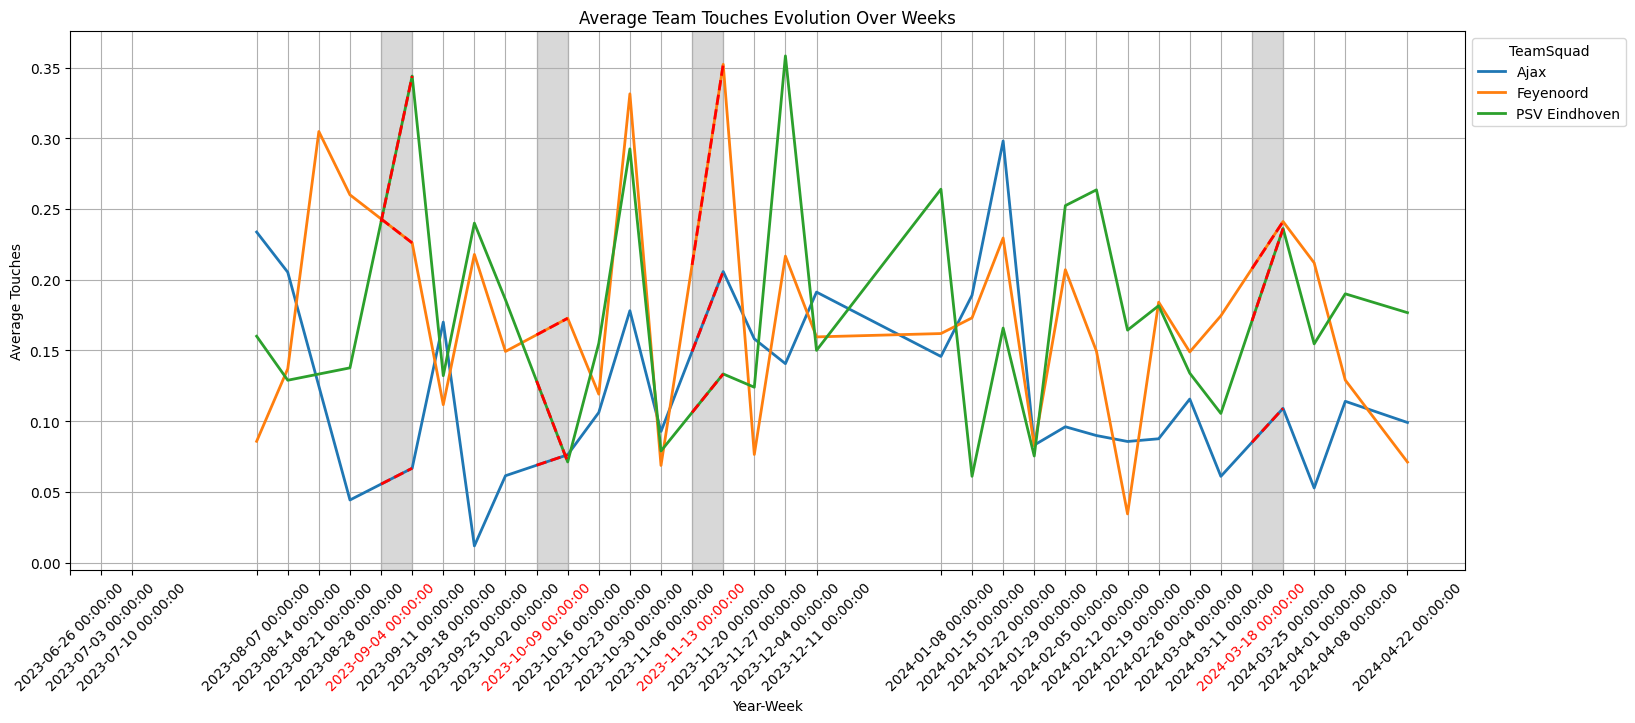

In [378]:

# Pivot the data for easier plotting
pivot_touches = avg_touches.pivot(index='YearWeek', columns='TeamSquad', values='xG')

# Calculate the overall mean 'Touches' across all teams for each week to identify breaks
overall_mean_touches = pivot_touches.mean(axis=1)

# Identify weeks where the mean 'Touches' is zero (potential international breaks)
break_weeks = overall_mean_touches[overall_mean_touches == 0].index

# Replace zero values with NaN temporarily to avoid influencing interpolation
for week in break_weeks:
    pivot_touches.loc[week] = np.nan

# Interpolate the missing values linearly
pivot_touches.interpolate(method='linear', inplace=True)

# Plotting
plt.figure(figsize=(18, 7))  # Adjust the figure size if necessary
ax = plt.gca()  # Get current axis

# Plot all data with regular lines
for column in pivot_touches.columns:
    ax.plot(pivot_touches.index, pivot_touches[column], marker='', linestyle='-', linewidth=2, label=column)

# Highlight break periods with shaded regions
for week in break_weeks:
    prev_week = pivot_touches.index[pivot_touches.index.get_loc(week)] if pivot_touches.index.get_loc(week) > 0 else week
    next_week = pivot_touches.index[pivot_touches.index.get_loc(week) + 1] if pivot_touches.index.get_loc(week) + 1 < len(pivot_touches.index) else week
    ax.axvspan(prev_week, next_week, color='grey', alpha=0.3)  # Shaded region for the break
    for column in pivot_touches.columns:
        ax.plot([prev_week, next_week], pivot_touches.loc[[prev_week, next_week], column], 'r--', linewidth=2)  # Dotted line over the break

plt.title('Average Team Touches Evolution Over Weeks')
plt.xlabel('Year-Week')
plt.ylabel('Average Touches')

# Set x-ticks to display all labels and rotate them for better readability
ax.set_xticks(pivot_touches.index)
ax.set_xticklabels(pivot_touches.index, rotation=45)  # Rotate labels for better visibility

# Modify x-axis label colors based on break weeks
for label in ax.get_xticklabels():
    if label.get_text() in break_weeks:
        label.set_color('red')  # Set the color to red for international break weeks

plt.legend(title='TeamSquad', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

#### Per player

/var/folders/t0/f1kbfy_n4433_n3x1c7px_hr0000gn/T/ipykernel_32748/3315423831.py:51: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(lines, labels=pivot_metric.columns, title='Player Name', loc='upper right', bbox_to_anchor=(1, 0.5))


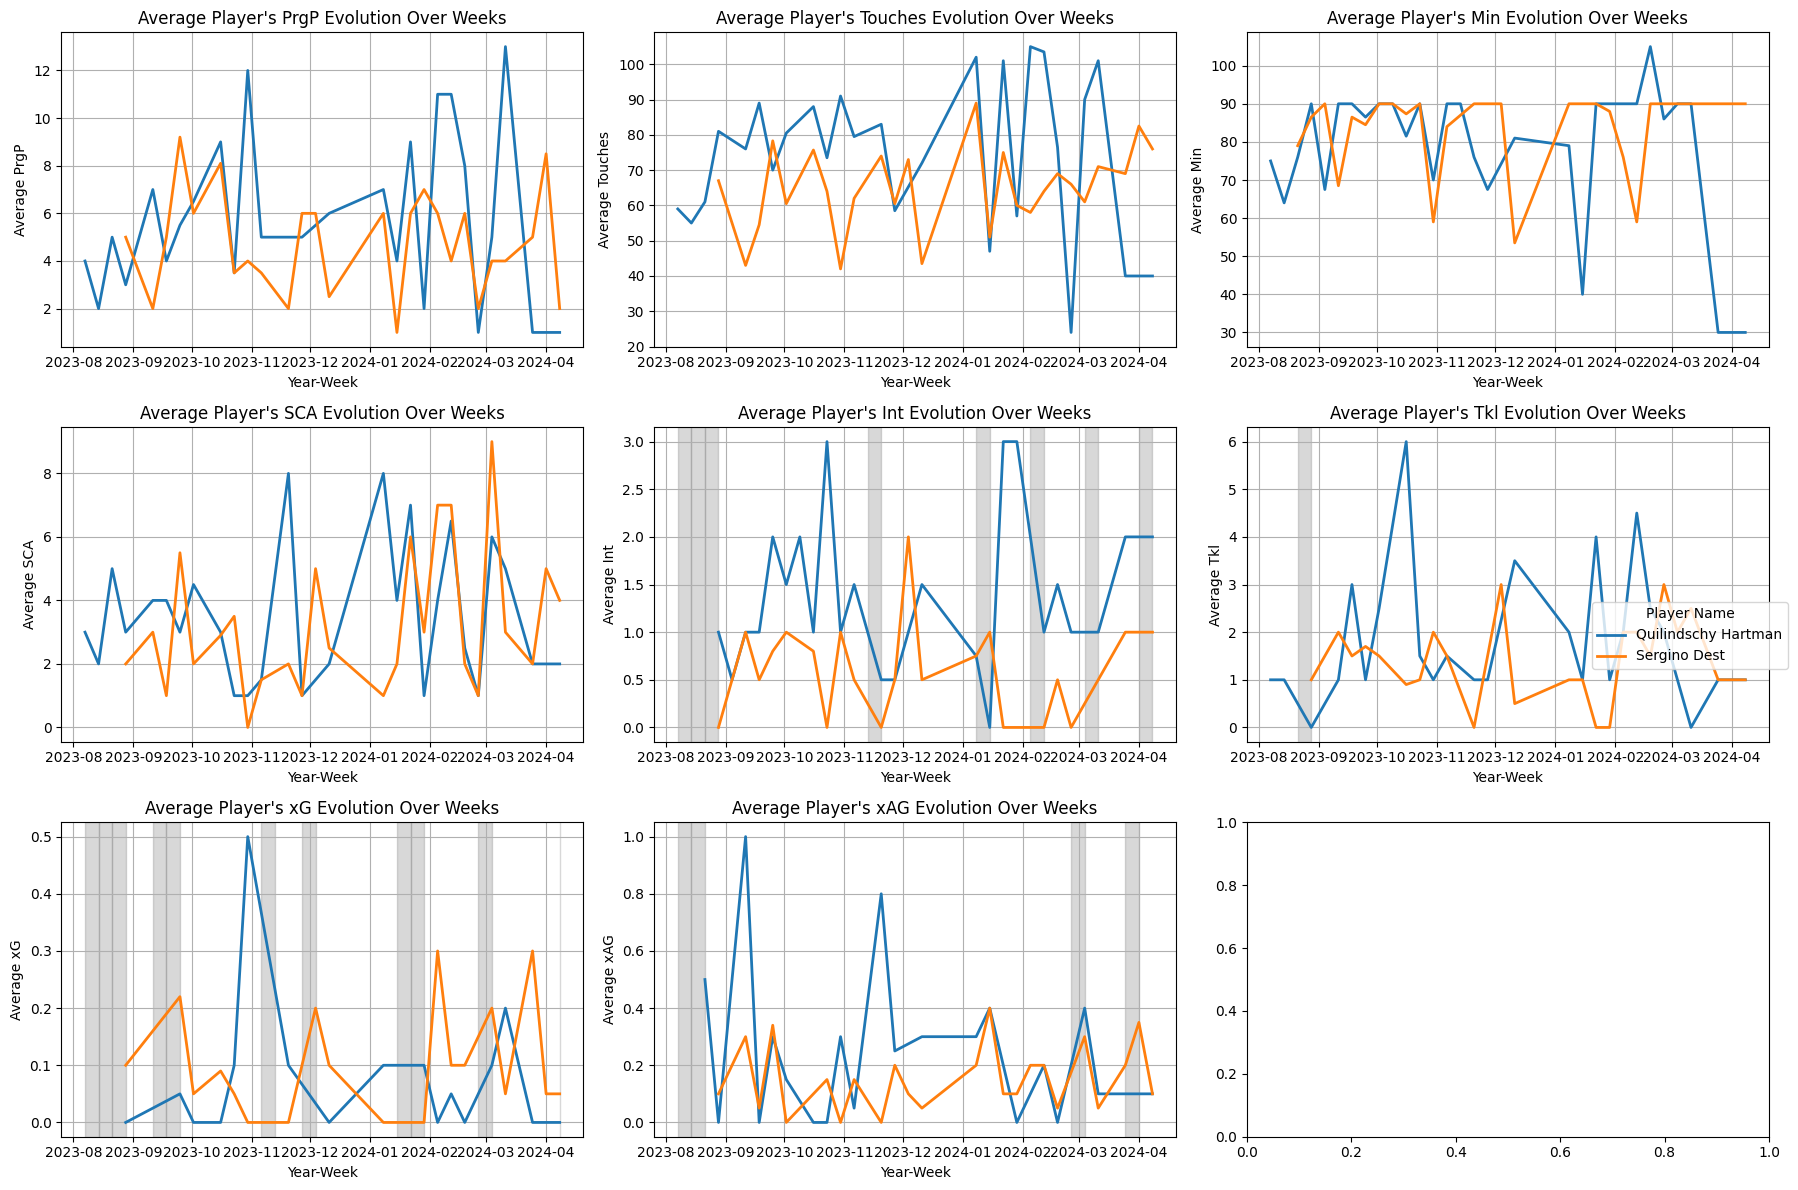

In [398]:
import pandas as pd
import matplotlib.pyplot as plt

# List of metrics to analyze
metrics = ['PrgP', 'Touches', 'Min', 'SCA', 'Int', 'Tkl', 'xG', 'xAG']  # Add or remove metrics as needed

# Assuming df is your DataFrame and it's already been loaded and prepared
players = ['Quilindschy Hartman', 'Sergino Dest']
player_data = df[df['Player Name'].isin(players)]

# Number of rows and columns for the subplot grid
nrows = 3  # Adjust as necessary
ncols = 3  # Adjust as necessary

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12))  # Adjust the figure size as necessary
axes = axes.flatten()  # Flatten the array to make indexing easier

for i, metric in enumerate(metrics):
    # Group by 'Player Name' and 'YearWeek' and calculate mean for the current metric
    avg_metric = player_data.groupby(['Player Name', 'YearWeek'])[metric].mean().reset_index()
    avg_metric['YearWeek'] = pd.to_datetime(avg_metric['YearWeek'] + '-1', format='%Y-%W-%w')
    avg_metric.sort_values('YearWeek', inplace=True)

    # Pivot the data for easier plotting
    pivot_metric = avg_metric.pivot(index='YearWeek', columns='Player Name', values=metric)

    # Identify breaks and interpolate as before
    mean_metric = pivot_metric.mean(axis=1)
    break_weeks = mean_metric[mean_metric == 0].index
    for week in break_weeks:
        pivot_metric.loc[week] = np.nan
    pivot_metric.interpolate(method='linear', inplace=True)

    # Plotting on the sub-axes
    ax = axes[i]
    lines = ax.plot(pivot_metric.index, pivot_metric, marker='', linestyle='-', linewidth=2)  # Save line objects for legend

    # Highlight break periods with shaded regions
    for week in break_weeks:
        prev_week = pivot_metric.index[pivot_metric.index.get_loc(week)] if pivot_metric.index.get_loc(week) > 0 else week
        next_week = pivot_metric.index[pivot_metric.index.get_loc(week) + 1] if pivot_metric.index.get_loc(week) + 1 < len(pivot_metric.index) else week
        ax.axvspan(prev_week, next_week, color='grey', alpha=0.3)

    # Set titles and labels
    ax.set_title('Average Player\'s ' + metric + ' Evolution Over Weeks')
    ax.set_xlabel('Year-Week')
    ax.set_ylabel('Average ' + metric)
    ax.grid(True)

# Set one legend for all subplots
fig.legend(lines, labels=pivot_metric.columns, title='Player Name', loc='upper right', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()